In [1]:
import numpy as np
import pandas as pd
from pyDOE import lhs

def latin_hypercube_sampling():
    # 定义变量范围和约束
    reaction_time_range = (1, 18)  # 反应时间范围1-18小时，整数
    ratio_range = (10, 1000)      # 比例范围10:1-1000:1
    
    # 定义比例的特殊值（100的倍数+边界值+50）
    ratio_special_values = sorted(list(set(
        [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    )))
    
    # 总样本点数
    n_samples = 216
    
    # 生成拉丁超立方样本（在[0,1]区间）
    samples = lhs(2, samples=n_samples, criterion='maximin')
    
    # 将样本映射到实际变量范围
    # 反应时间：1-18的整数
    reaction_time_samples = np.round(
        samples[:, 0] * (reaction_time_range[1] - reaction_time_range[0]) + reaction_time_range[0]
    ).astype(int)
    
    # 比例：从特殊值中均匀选择
    ratio_indices = np.floor(samples[:, 1] * len(ratio_special_values)).astype(int)
    ratio_indices = np.clip(ratio_indices, 0, len(ratio_special_values)-1)
    ratio_samples = np.array([ratio_special_values[i] for i in ratio_indices])
    
    # 创建DataFrame保存结果
    df = pd.DataFrame({
        'Reaction Time (hours)': reaction_time_samples,
        'Monomer/CTA Ratio': ratio_samples
    })
    
    # 检查是否有重复样本
    if df.duplicated().any():
        print("Warning: Duplicate samples found. Consider increasing sample size or adjusting criteria.")
    
    return df

# 执行采样并显示结果
sampled_data = latin_hypercube_sampling()
print(sampled_data.head(10))
print(f"\nTotal samples: {len(sampled_data)}")

# 保存到CSV文件
sampled_data.to_csv('latin_hypercube_samples.csv', index=False)

   Reaction Time (hours)  Monomer/CTA Ratio
0                     18                 50
1                     11                 10
2                      7                900
3                     13                 10
4                     12                900
5                     17               1000
6                     13                 50
7                      6                 50
8                      7                800
9                      1                900

Total samples: 216


/tmp/ipykernel_7324/1015947937.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([sampled_data['Reaction Time (hours)'],


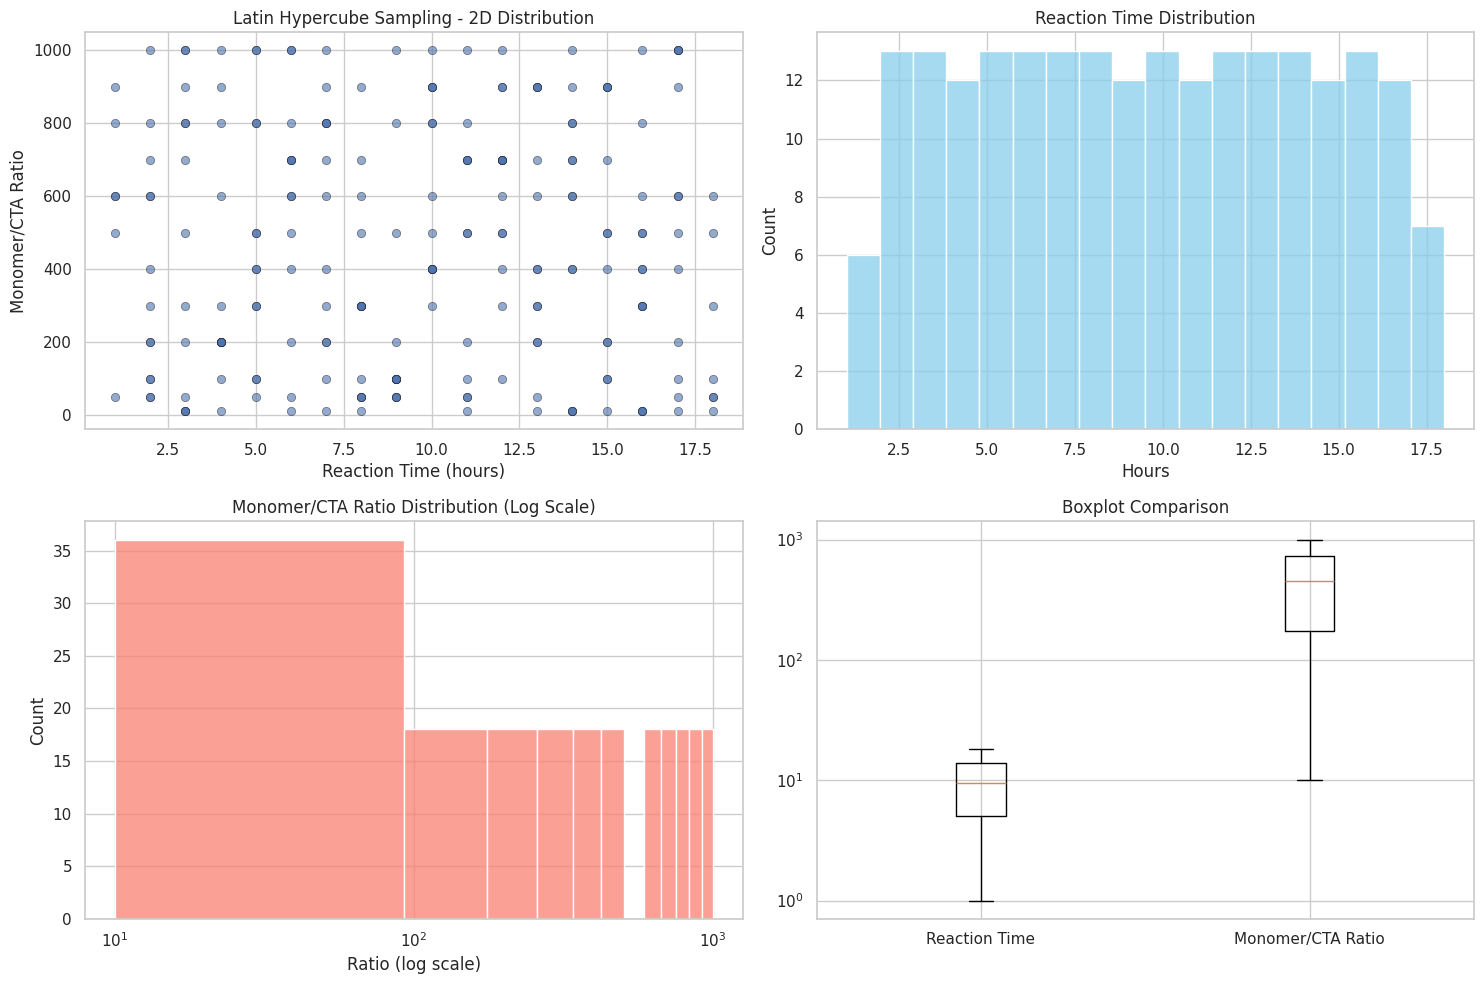

<Figure size 1000x800 with 0 Axes>

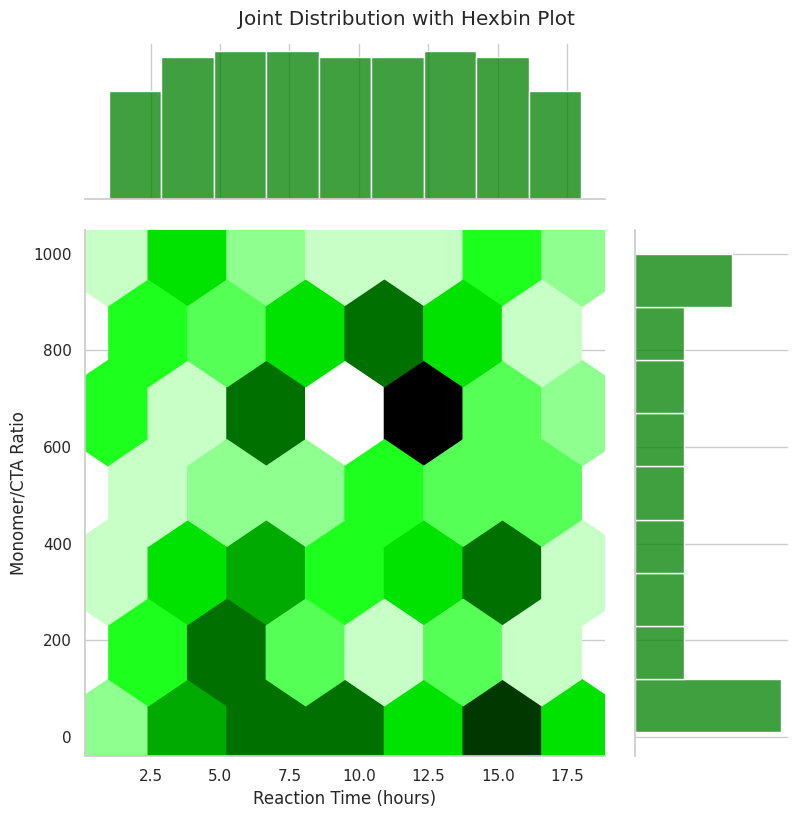

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设sampled_data是前面生成的拉丁超立方采样数据
# 如果尚未生成，可以先运行前面的采样代码
# sampled_data = latin_hypercube_sampling()

def visualize_lhs_data(sampled_data):
    # 设置图形风格
    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 10))
    
    # 1. 散点图 - 显示二维分布
    plt.subplot(2, 2, 1)
    sns.scatterplot(data=sampled_data, x='Reaction Time (hours)', y='Monomer/CTA Ratio', 
                    alpha=0.6, edgecolor='k')
    plt.title('Latin Hypercube Sampling - 2D Distribution')
    
    # 2. 反应时间的直方图
    plt.subplot(2, 2, 2)
    sns.histplot(sampled_data['Reaction Time (hours)'], bins=18, kde=False, color='skyblue')
    plt.title('Reaction Time Distribution')
    plt.xlabel('Hours')
    
    # 3. 比例的直方图（对数尺度）
    plt.subplot(2, 2, 3)
    sns.histplot(sampled_data['Monomer/CTA Ratio'], bins=12, kde=False, color='salmon')
    plt.xscale('log')
    plt.title('Monomer/CTA Ratio Distribution (Log Scale)')
    plt.xlabel('Ratio (log scale)')
    
    # 4. 箱线图 - 比较两个变量的分布
    plt.subplot(2, 2, 4)
    plt.boxplot([sampled_data['Reaction Time (hours)'], 
                 sampled_data['Monomer/CTA Ratio']], 
                labels=['Reaction Time', 'Monomer/CTA Ratio'])
    plt.title('Boxplot Comparison')
    plt.yscale('log')  # 比例用对数尺度
    
    plt.tight_layout()
    plt.savefig('lhs_visualization1.pdf', dpi=300, bbox_inches='tight')
    plt.savefig('lhs_visualization1.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 5. 额外的联合分布图（需要seaborn）
    plt.figure(figsize=(10, 8))
    sns.jointplot(data=sampled_data, x='Reaction Time (hours)', y='Monomer/CTA Ratio',
                  kind='hex', height=8, ratio=3, color='green')
    plt.suptitle('Joint Distribution with Hexbin Plot', y=1.02)
    plt.savefig('lhs_visualization2.pdf', dpi=300, bbox_inches='tight')
    plt.savefig('lhs_visualization2.png', dpi=300, bbox_inches='tight')
    plt.show()

# 执行可视化
visualize_lhs_data(sampled_data)

In [6]:
# plt.savefig?